In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import pickle
import datetime
from termcolor import colored
from tsr_helpers import print_executed
from test_map import filter_detections_by_width, compute_mean_average_precision

MODEL_NAME = 'hog_svm'

print_executed()


# Open file with detections
with open('/Users/michal/PycharmProjects/HOG_TSR/dataset/test_images/output/detections_output_result.pkl',
          'rb') as pickle_file:
    detections = pickle.load(pickle_file)
  
print(type(detections), len(detections), detections[0].keys(), '\n')
# print(detections[4], '\n')

# Set categories and indices
categories = [{'id': 1, 'name': 'sign'}]
category_index = {1: categories[0]}

print_executed()


# Determine division of bbocxes - small, medium, large = ab, bc, cd
a = 0
b = 10
c = 14
d = 416

detections_small = filter_detections_by_width(detections, a, b)
detections_medium = filter_detections_by_width(detections, b, c)
detections_large = filter_detections_by_width(detections, c, d)

for i in detections_small:
    print(i, '\n')

print('Large: ', len(detections_large))
print('Small: ', len(detections_small))
print('Medium: ', len(detections_medium))
print('Overall: ', len(detections))

print(colored("EXECUTED AT " + str(datetime.datetime.now()), 'green'))


 EXECUTED BLOCK AT 17:39:43
<class 'list'> 20 dict_keys(['file', 'file_path', 'gt_classes', 'gt_bboxes', 'pred_classes', 'pred_bboxes', 'confidences']) 


 EXECUTED BLOCK AT 17:39:43
0 10
Pred bbox num 0 of image 00109.ppm was not removed
Pred bbox num 0 of image 00323.ppm was not removed
Pred bbox num 1 of image 00323.ppm was not removed
Pred bbox num 1 of image 00445.ppm was not removed
Pred bbox num 0 of image 00492.ppm was not removed
Pred bbox num 0 of image 00486.ppm was not removed
0
10 14
Pred bbox num 0 of image 00109.ppm was not removed
Pred bbox num 0 of image 00323.ppm was not removed
Pred bbox num 1 of image 00323.ppm was not removed
Pred bbox num 1 of image 00445.ppm was not removed
Pred bbox num 0 of image 00492.ppm was not removed
Pred bbox num 0 of image 00486.ppm was not removed
0
14 416
22
{'file': '00109.ppm', 'file_path': '/Users/michal/Tensorflow/datasets/GTSDB/00109.ppm', 'gt_classes': [], 'gt_bboxes': [], 'pred_classes': [], 'pred_bboxes': [], 'confidences': []

IoU threshold set to: 0.10
TP: 7.0
FP: 28.0
FN: 15.0
Avg. overlap for sign = 0.3589
Precision for sign = 0.2000
Recall for sign = 0.3182
AP for sign = 0.0795
Mean AP = 0.0795
~~~~~~~~
Results:
  class  precision    recall      ap
0  sign        0.2  0.318182  0.0795
----- Small detections -----
IoU threshold set to: 0.10
Mean AP = nan
~~~~~~~~
Results:
Empty DataFrame
Columns: [class, precision, recall, ap]
Index: []
----- Medium detections -----
IoU threshold set to: 0.10
Mean AP = nan
~~~~~~~~
Results:
Empty DataFrame
Columns: [class, precision, recall, ap]
Index: []
----- Large detections -----
IoU threshold set to: 0.10
TP: 7.0
FP: 28.0
FN: 15.0
Avg. overlap for sign = 0.3589
Precision for sign = 0.2000
Recall for sign = 0.3182
AP for sign = 0.0795
Mean AP = 0.0795
~~~~~~~~
Results:
  class  precision    recall      ap
0  sign        0.2  0.318182  0.0795


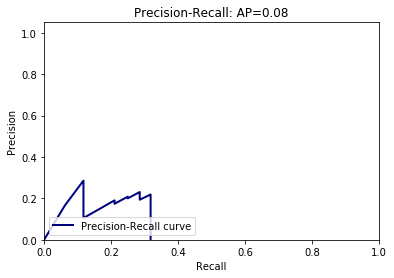

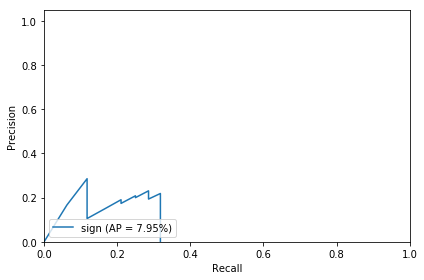

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

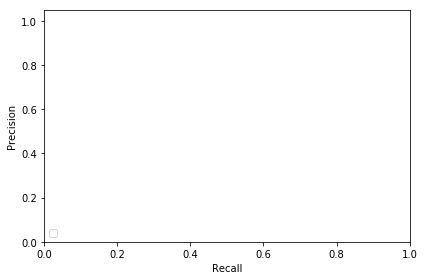

<Figure size 432x288 with 0 Axes>

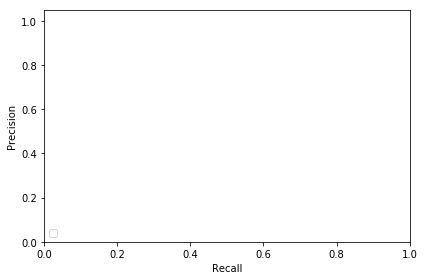

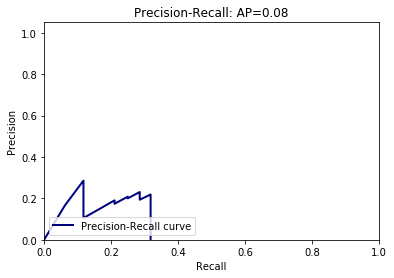

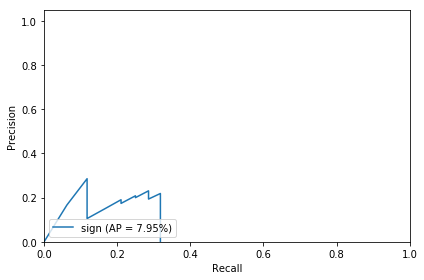

0.0795004627725216

<Figure size 432x288 with 0 Axes>

In [2]:
path = '/Users/michal/PycharmProjects/HOG_TSR/dataset/test_images/output/'
compute_mean_average_precision(detections, categories, category_index, path, MODEL_NAME + "_all")
print("----- Small detections -----")
compute_mean_average_precision(detections_small, categories, category_index, path, MODEL_NAME + "_small")
print("----- Medium detections -----")
compute_mean_average_precision(detections_medium, categories, category_index, path, MODEL_NAME + "_medium")
print("----- Large detections -----")
compute_mean_average_precision(detections_large, categories, category_index, path, MODEL_NAME + "_large")
